## Libraries imports:

In [1]:
import numpy as np
import pandas as pd
import pylab as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



## Read attacks.csv from local folder:

In [2]:
data = pd.read_csv(r'C:\Users\pombo\OneDrive\Escritorio\Ironhack\Labs\Day10Proy\pombo7676-Proyecto-Semana-2-Sharks-Inigo-Larrea\Data\attacks.csv', encoding='latin1' )
pd.set_option('display.max_columns', None)

data.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


### How many rows and columns does my DB have?

In [3]:
data.shape

(25723, 24)

### Which columns do I have in my DB?

In [4]:
columns = data.columns

columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

### Type of data and non-null values of my DB:

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

### From the results given by the previous table we can imagine that the useful data rows will be around 6300...as most of the columns have around those non-null values. 

     Later on I will investigate the reason for this data.info()

### Find columns that have excesive null values. Could happen that some random values where typped in by mistake!!

Percentage of null values per column:

In [6]:
nan_cols = data.isna().mean()*100  # serie con los valores nulos por columna en porcentaj

nan_cols

Case Number               66.170353
Date                      75.500525
Year                      75.508300
Type                      75.516075
Country                   75.694903
Area                      77.269370
Location                  77.599813
Activity                  77.615364
Name                      76.316915
Sex                       77.697003
Age                       86.506240
Injury                    75.609377
Fatal (Y/N)               77.595926
Time                      88.539439
Species                   86.533453
Investigator or Source    75.566614
pdf                       75.500525
href formula              75.504412
href                      75.500525
Case Number.1             75.500525
Case Number.2             75.500525
original order            75.473312
Unnamed: 22               99.996112
Unnamed: 23               99.992225
dtype: float64

### From the previous data we can say Unnamed columns are practicaly full of null values and by these means we can drop these colunmns as they don't give us significant information about the Shark attacks...

    Drop columns with more than 90% Null Values:

In [7]:
nan_cols_90 = []

# Delete columns containing either 90% or more than 90% NaN Values

perc = 90.0
min_count =  int(((100-perc)/100)*data.shape[0] + 1)
data = data.dropna( axis=1, thresh=min_count)


data.head()


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0



### I want to see in a graphic how are the Nulls distributed in our dataframe:


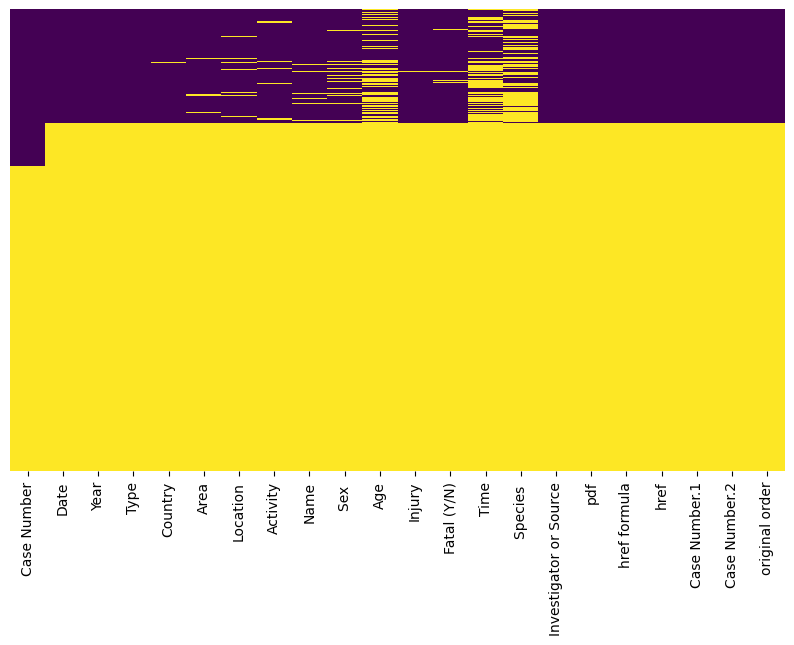

In [8]:
plt.figure(figsize=(10, 6))  # inicia la figura y establece tamaño

sns.heatmap(data.isna(),  # mapa de calor
           yticklabels=False,
           cmap='viridis',
           cbar=False)

plt.show()



### From the previous graphic we can come into conclusion that something strange happened in 'Case Number' column that has values where the other columns do not have any value...I am going to investigate visually by printing values around row 6300 to see exactly what is happening there and if I can drop several rows that have no useful information:



### I am going to execute a drop_duplicates function, as most likely many of those rows with Null values are duplicates:


In [9]:
data = data.drop_duplicates()

data.shape

(6312, 22)

### Now we see that I have dropped more than 20.000 rows due to their duplicity in between each other probably because the data retriever made a mistake when creating inputs in the worksheet...

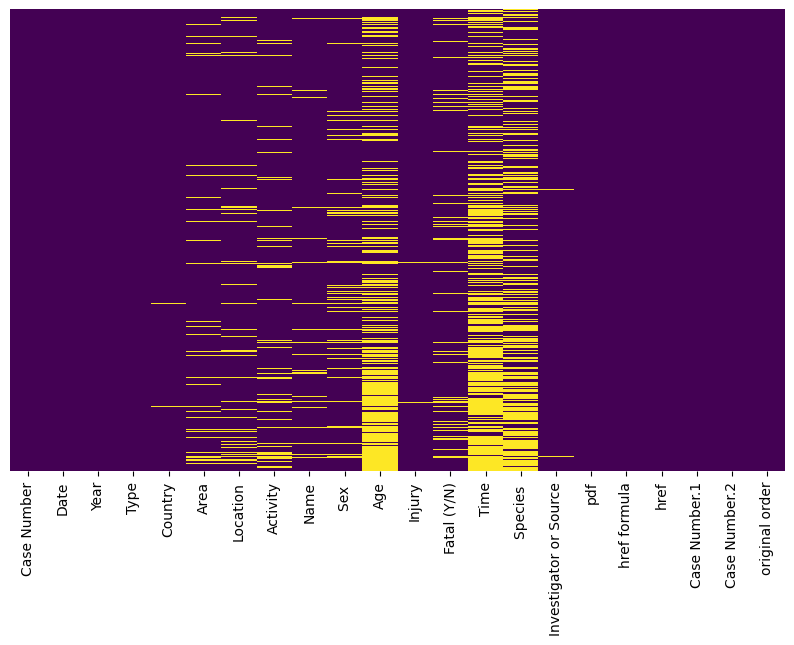

In [10]:
plt.figure(figsize=(10, 6))  # inicia la figura y establece tamaño

sns.heatmap(data.isna(),  # mapa de calor
           yticklabels=False,
           cmap='viridis',
           cbar=False)

plt.show()

### Now we can see that we cleaned all de Null values that were in the lower part of the chart, because they were duplicates of a strange column.

Next step will be to check the tail of the Dataframe, as probably some rows kept are still not of value for the dataframe.

In [11]:
data.tail(15)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0
6301,ND.0001,1845-1853,0.0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,male,M,15,"FATAL. ""Shark bit him in half, carrying away t...",Y,NaN,NaN,S.W. Baker,ND-0001-Ceylon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0001,ND.0001,2.0
6302,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6304.0
6303,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6305.0
6304,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6306.0
6305,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6307.0
6306,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6308.0


### As we can observe in the previous table, rows 6302 till the end have no useful information and are product of mistaken inputs of the data retriever.

We can drop those rows manually:

In [12]:
data.drop(data.index[6302::], inplace=True)

data.shape

(6302, 22)

### Remaining registers in the cleaned Dataframe are now 6302!

### Now we are going to search for null values inside the shrinked dataframe:


In [13]:
nan_cols = data.isna().sum()  # serie con los valores nulos por columna en porcentaj

nan_cols[nan_cols>0]

Case Number                  1
Year                         2
Type                         4
Country                     50
Area                       455
Location                   540
Activity                   544
Name                       210
Sex                        565
Age                       2831
Injury                      28
Fatal (Y/N)                539
Time                      3354
Species                   2838
Investigator or Source      17
href formula                 1
dtype: int64

### Now I am going to investigate what is happening with column 'Case Number' specific null:

In [14]:
data[data['Case Number'].isna()]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
5488,NaN,Reported 06-Sep-1905,1905.0,Provoked,USA,Florida,"Fort Pierce, St Lucie County",Fishing,David Curry,M,NaN,Lacerations to leg from hooked shark PROVOKED ...,N,NaN,NaN,"Muncie Evening Press, 8/6/1913",1905.09.06.R-Curry.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1905.09.06.R,1905.09.06.R,815.0


#### Im am going to check sorrounding values to check the structure and esence of the value I need to input in that box of the Dataframe:

In [15]:
data[5486:5490]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
5486,1905.12.29,29-Dec-1905,1905.0,Invalid,AUSTRALIA,Western Australia,Geraldton,Bathing,Hugh Carroll,M,NaN,"""Bad wound in the leg"" - 7-ft shark caught in ...",NaN,NaN,Shark involvement not confirmed,"The Advertiser, 12/30/1905",1905.12.29-Carroll.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1905.12.29,1905.12.29,817.0
5487,1905.09.29,29-Sep-1905,1905.0,Unprovoked,AUSTRALIA,New South Wales,"Waverly, Sydney",Swimming,Jame Crotty,M,NaN,FATAL. Shark involvement suspected but not con...,Y,NaN,NaN,"The Argus, 9/30/1905",1905.09.29-Crotty.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1905.09.29,1905.09.29,816.0
5488,NaN,Reported 06-Sep-1905,1905.0,Provoked,USA,Florida,"Fort Pierce, St Lucie County",Fishing,David Curry,M,NaN,Lacerations to leg from hooked shark PROVOKED ...,N,NaN,NaN,"Muncie Evening Press, 8/6/1913",1905.09.06.R-Curry.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1905.09.06.R,1905.09.06.R,815.0
5489,1905.08.24,24-Aug-1905,1905.0,Invalid,EGYPT,Suez Canal,Port Said,Human head found in shark caught by British st...,NaN,M,NaN,Probable drowning & scavenging.,NaN,NaN,"Tiger shark, 3.9 m","C. Moore, GSAF",1905.08.24-Head-in-shark.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1905.08.24,1905.08.24,814.0


### Once checked the table we can see clearly that inside that box we must input the date of the attack, unless the is more than one attack per day.

So we input the date in that specific box:

In [16]:
data.at[5488,'Case Number'] = '1905.09.06'

In [17]:
data[5486:5490]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
5486,1905.12.29,29-Dec-1905,1905.0,Invalid,AUSTRALIA,Western Australia,Geraldton,Bathing,Hugh Carroll,M,NaN,"""Bad wound in the leg"" - 7-ft shark caught in ...",NaN,NaN,Shark involvement not confirmed,"The Advertiser, 12/30/1905",1905.12.29-Carroll.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1905.12.29,1905.12.29,817.0
5487,1905.09.29,29-Sep-1905,1905.0,Unprovoked,AUSTRALIA,New South Wales,"Waverly, Sydney",Swimming,Jame Crotty,M,NaN,FATAL. Shark involvement suspected but not con...,Y,NaN,NaN,"The Argus, 9/30/1905",1905.09.29-Crotty.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1905.09.29,1905.09.29,816.0
5488,1905.09.06,Reported 06-Sep-1905,1905.0,Provoked,USA,Florida,"Fort Pierce, St Lucie County",Fishing,David Curry,M,NaN,Lacerations to leg from hooked shark PROVOKED ...,N,NaN,NaN,"Muncie Evening Press, 8/6/1913",1905.09.06.R-Curry.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1905.09.06.R,1905.09.06.R,815.0
5489,1905.08.24,24-Aug-1905,1905.0,Invalid,EGYPT,Suez Canal,Port Said,Human head found in shark caught by British st...,NaN,M,NaN,Probable drowning & scavenging.,NaN,NaN,"Tiger shark, 3.9 m","C. Moore, GSAF",1905.08.24-Head-in-shark.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1905.08.24,1905.08.24,814.0


### Now we are going to check the null values of the next column with Null values...'Year'

In [18]:
data[data['Year'].isna()]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
187,2017.01.08.R,Reported 08-Jan-2017,NaN,Invalid,AUSTRALIA,Queensland,NaN,Spearfishing,Kerry Daniel,M,35,"No attack, shark made a threat display",NaN,NaN,Bull shark,Liquid Vision 1/8/2017,2017.01.08.R-KerryDaniel.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.01.08.R,2017.01.08.R,6116.0
6079,1836.08.19.R,Reported 19-Aug-1836,NaN,Unprovoked,ENGLAND,Cumberland,Whitehaven,Swimming,a boy,M,NaN,FATAL,Y,NaN,NaN,"C. Moore, GSAF",1835.08.19.R-Whitehaven.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1836.08.19.R,1836.08.19.R,224.0


#### As we can see there ir 2 values with NaN while we can clearly see when the attack happened...

Let's fill them in:

In [19]:
data.at[187,'Year'] = 2017
data.at[6079,'Year'] = 1836

data.loc[[187]]


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
187,2017.01.08.R,Reported 08-Jan-2017,2017.0,Invalid,AUSTRALIA,Queensland,NaN,Spearfishing,Kerry Daniel,M,35,"No attack, shark made a threat display",NaN,NaN,Bull shark,Liquid Vision 1/8/2017,2017.01.08.R-KerryDaniel.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.01.08.R,2017.01.08.R,6116.0


In [20]:
data.loc[[6079]]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
6079,1836.08.19.R,Reported 19-Aug-1836,1836.0,Unprovoked,ENGLAND,Cumberland,Whitehaven,Swimming,a boy,M,NaN,FATAL,Y,NaN,NaN,"C. Moore, GSAF",1835.08.19.R-Whitehaven.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1836.08.19.R,1836.08.19.R,224.0


### I am going to check the incosistencies of the Year column, but first I am going to assign the type of the column to int16:

In [21]:
data.Year=data.Year.astype(dtype='int16')

In [22]:
data.Year.unique()

array([2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008,
       2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997,
       1996, 1995, 1984, 1994, 1993, 1992, 1991, 1990, 1989, 1969, 1988,
       1987, 1986, 1985, 1983, 1982, 1981, 1980, 1979, 1978, 1977, 1976,
       1975, 1974, 1973, 1972, 1971, 1970, 1968, 1967, 1966, 1965, 1964,
       1963, 1962, 1961, 1960, 1959, 1958, 1957, 1956, 1955, 1954, 1953,
       1952, 1951, 1950, 1949, 1948, 1848, 1947, 1946, 1945, 1944, 1943,
       1942, 1941, 1940, 1939, 1938, 1937, 1936, 1935, 1934, 1933, 1932,
       1931, 1930, 1929, 1928, 1927, 1926, 1925, 1924, 1923, 1922, 1921,
       1920, 1919, 1918, 1917, 1916, 1915, 1914, 1913, 1912, 1911, 1910,
       1909, 1908, 1907, 1906, 1905, 1904, 1903, 1902, 1901, 1900, 1899,
       1898, 1897, 1896, 1895, 1894, 1893, 1892, 1891, 1890, 1889, 1888,
       1887, 1886, 1885, 1884, 1883, 1882, 1881, 1880, 1879, 1878, 1877,
       1876, 1875, 1874, 1873, 1872, 1871, 1870, 18

In [23]:
data[data['Year']==0].head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
6177,0000.0214,Ca. 214 B.C.,0,Unprovoked,NaN,Ionian Sea,NaN,Ascending from a dive,"Tharsys, a sponge diver",M,NaN,"FATAL, shark/s bit him in two",Y,NaN,NaN,"Reported by Greek poet, Leonidas of Tarentum (...",214BC-Tharsys.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0000.0214,0000.0214,126.0
6178,0000.0336,Ca. 336.B.C..,0,Unprovoked,GREECE,Piraeus,In the haven of Cantharus,Washing his pig in preparation for a religious...,A candidate for initiation,M,NaN,"FATAL, shark ""bit off all lower parts of him u...",Y,NaN,NaN,Plutarch (45 - 125 A.D.) in Life of Phoecion (...,336-BC-Carnathus.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0000.0336,0000.0336,125.0
6179,0000.0493,493 B.C.,0,Sea Disaster,GREECE,Off Thessaly,NaN,Shipwrecked Persian Fleet,males,M,NaN,Herodotus tells of sharks attacking men in the...,Y,NaN,NaN,Herodotus (485 - 425 B.C.),493BC-PersianFleet.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0000.0493,0000.0493,124.0
6180,0000.0725,Ca. 725 B.C.,0,Sea Disaster,ITALY,Tyrrhenian Sea,Krater found during excavations at Lacco Ameno...,Shipwreck,males,M,NaN,Depicts shipwrecked sailors attacked by a sha...,Y,NaN,NaN,"V.M. Coppleson (1958), p.262, et al",725BC-vase.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0000.0725,0000.0725,123.0
6181,ND-0154,Before 1939,0,Unprovoked,CANADA,NaN,Grand Banks,Fishing,Joe Folsom,M,NaN,Arm bitten,N,NaN,NaN,"C.E.Russell, pp. 310-311",ND-0154-Folsom.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND-0154,ND-0154,122.0


### Here we can see that when it says 0 in Year, there is no clear info about the year when it happened. So my decision is to leave it like that and regarding stats not take them into account. Only 125 records are affected, so it will not affect heavily on stats

### As we can see in the Year column values are represented as a float, but we should want to have an integer as type for the values of that column...in the same line, 'original order' column should also be type integers column... 

I think int16 should be enough for Year case and for the 'original order' I will use int32



In [24]:
data['original order'] =data['original order'].astype(dtype='int32')


data.loc[[6079]]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
6079,1836.08.19.R,Reported 19-Aug-1836,1836,Unprovoked,ENGLAND,Cumberland,Whitehaven,Swimming,a boy,M,NaN,FATAL,Y,NaN,NaN,"C. Moore, GSAF",1835.08.19.R-Whitehaven.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1836.08.19.R,1836.08.19.R,224


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6302 entries, 0 to 6301
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case Number             6302 non-null   object
 1   Date                    6302 non-null   object
 2   Year                    6302 non-null   int16 
 3   Type                    6298 non-null   object
 4   Country                 6252 non-null   object
 5   Area                    5847 non-null   object
 6   Location                5762 non-null   object
 7   Activity                5758 non-null   object
 8   Name                    6092 non-null   object
 9   Sex                     5737 non-null   object
 10  Age                     3471 non-null   object
 11  Injury                  6274 non-null   object
 12  Fatal (Y/N)             5763 non-null   object
 13  Time                    2948 non-null   object
 14  Species                 3464 non-null   object
 15  Inve

### Next we are going to focus on investigating the type of attack:


In [26]:
data[data['Type'].isna()]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
85,2017.09.15.a,15-Sep-2017,2017,NaN,SAMOA,Upolu Island,Nofoalii,Fishing,male,M,NaN,Injuries to hands and legs,N,Night,NaN,"Samoa Observer, 9/16/2017",2017.09.15.a-Samoa.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.09.15.a,2017.09.15.a,6218
382,2015.07.27,27-Jul-2015,2015,NaN,AUSTRALIA,Victoria,Tyrendarra Beach,Surfing,male,M,40,Injury to hand,NaN,NaN,NaN,NaN,2015.07.27-Victoria.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.07.27,2015.07.27,5921
4867,1936.09.11.R,Reported 11-Sep-1936,1936,NaN,VIETNAM,NaN,Saigon,Wreck of a sampam,8 crew,M,NaN,FATAL,Y,NaN,NaN,"Lansing State Journal, 9/11/1936",1936.09.11-Saigon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1936.09.11.R,1936.09.11.R,1436
5705,1890.03.03.R,Reported 03-Mar-1890,1890,NaN,CEYLON,NaN,NaN,Diving,a pearl diver,M,NaN,FATAL,Y,NaN,NaN,"The Guardian, 3/3/1890",1890.03.03.R-Ceylon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1890.03.03.R,1890.03.03.R,598


### As I do not have information about the type of attack, I decide to fill in the gaps with 'Unknown':

In [27]:
data['Type'].fillna('unknown', inplace=True)

### Check Nulls left:

In [28]:
nan_cols = data.isna().sum()  # serie con los valores nulos por columna en porcentaj

nan_cols[nan_cols>0]

Country                     50
Area                       455
Location                   540
Activity                   544
Name                       210
Sex                        565
Age                       2831
Injury                      28
Fatal (Y/N)                539
Time                      3354
Species                   2838
Investigator or Source      17
href formula                 1
dtype: int64

### Next we are going to focus on investigating the country where the attacks happened and if possible fill in with country, if not fill the gap with unknown:

In [29]:
data[data['Country'].isna()].head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
62,2017.11.13.R,Reported 13-Nov-2017,2017,Unprovoked,NaN,NaN,NaN,Surfing,Timur Yunusov,M,24,Puncture wounds to feet,N,NaN,NaN,Instagram,2017.11.13.R-Timur.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.11.13.R,2017.11.13.R,6241
525,2014.08.00,Aug-2014,2014,Invalid,NaN,NaN,NaN,Sea disaster,Cuban refugees,M,NaN,Shark involvement prior to death not confirmed,NaN,NaN,Shark involvement not confirmed,"Associated Press, 11/27/2014",2014.08.00-Cuban-refugees.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2014.08.00,2014.08.00,5778
2956,1983.00.00.d,Ca. 1983,1983,Unprovoked,NaN,English Channel,NaN,Swimming,Padma Shri Taranath Narayan Shenoy,M,NaN,Left leg bitten,N,NaN,NaN,"Times of India, 2/5/2012",1983.00.00.d-Shenoy.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1983.00.00.d,1983.00.00.d,3347
3378,1970.11.00,Nov-1970,1970,Unprovoked,NaN,NaN,NaN,NaN,Heinz Plotsky,M,NaN,Extensive injuries,N,NaN,NaN,"H.D. Baldridge (1994), SAF Case #1645",1970.11.00-NV-Plotsky.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1970.11.00,1970.11.00,2925
3387,1970.08.02,02-Aug-1970,1970,Invalid,NaN,Caribbean Sea,Between St. Kitts & Nevis,Sea Disaster Sinking of ferryboat Christina,NaN,NaN,NaN,"Sharks scavenged on bodies, but no record of t...",NaN,Afternoon,Shark involvement prior to death was not confi...,"Rome News Tribune, 8/3/1970",1970.08.02-Christina-ferryboat.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1970.08.02,1970.08.02,2916


In [30]:
data.at[2956,'Country'] = 'UNITED KINGDOM'
data.at[3387,'Country'] = 'ST. KITTS & NEVIS'
data.at[3605,'Country'] = 'CUBA'
data.at[4018,'Country'] = 'AUSTRALIA'
data.at[4231,'Country'] = 'INDIA'
data.at[4266,'Country'] = 'MADAGASCAR'
data.at[4498,'Country'] = 'CUBA'
data.at[4639,'Country'] = 'CHINA'
data.at[4712,'Country'] = 'VIRGIN ISLANDS'
data.at[5020,'Country'] = 'FRANCE'
data.at[5742,'Country'] = 'MEXICO'
data.at[5810,'Country'] = 'USA'
data.at[6137,'Country'] = 'BRITISH ISLES'

data['Country'].fillna('unknown', inplace=True)


### Next I will focus on cleaning the Countries:

First I check with *.value_counts the presence of countries and the possibility of some of them written wrong...

In [31]:
#pd.set_option("display.max_rows", None)

data['Country'].value_counts()


USA                       2230
AUSTRALIA                 1339
SOUTH AFRICA               579
PAPUA NEW GUINEA           134
NEW ZEALAND                128
                          ... 
MALDIVE ISLANDS              1
NICARAGUA                    1
NORTH SEA                    1
RED SEA / INDIAN OCEAN       1
CEYLON (SRI LANKA)           1
Name: Country, Length: 215, dtype: int64

### From the table above I could see the following had issues in their name, anyways some of them do not refer to a country, but as I do not have conclusive information I will leave it as it is.

In [32]:
data['Country'][data['Country'] == 'ASIA?'] = 'ASIA'

data['Country'][data['Country'] == ' TONGA'] = 'TONGA'

data['Country'][data['Country'] == ' PHILIPPINES'] = 'PHILIPPINES'

data['Country'][data['Country'] == 'SUDAN?'] = 'SUDAN'

data['Country'][data['Country'] == 'RED SEA?'] = 'EGIPT'

data['Country'][data['Country'] == 'INDIAN OCEAN?'] = 'INDIAN OCEAN'

In [33]:
nan_cols = data.isna().sum()  # serie con los valores nulos por columna en porcentaj

nan_cols[nan_cols>0]

Area                       455
Location                   540
Activity                   544
Name                       210
Sex                        565
Age                       2831
Injury                      28
Fatal (Y/N)                539
Time                      3354
Species                   2838
Investigator or Source      17
href formula                 1
dtype: int64

### Now we want to fill in the nulls of Area, location, Activity and name. The best idea would be to investigate and see if by mistake these atributes are in another column, but as there is a lot of information and not to much time to process it, my decision is to apply unknown for nulls...


In [34]:
data['Area'].fillna('unknown', inplace=True)
data['Location'].fillna('unknown', inplace=True)
data['Activity'].fillna('unknown', inplace=True)
data['Name'].fillna('unknown', inplace=True)

## I am going to rename the columns, as I have seen that some columns have space characters:

In [35]:
data.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order'],
      dtype='object')

In [36]:
cols = ['Case_Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal_(Y/N)', 'Time',
       'Species', 'Investigator_or_Source', 'pdf', 'href_formula', 'href',
       'Case_Number.1', 'Case_Number.2', 'original_order']

data.columns = cols


### Let's check the cases where we don't know the sex:

In [37]:
data[data['Sex'].isna()].head()

,Case_Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal_(Y/N),Time,Species,Investigator_or_Source,pdf,href_formula,href,Case_Number.1,Case_Number.2,original_order
32,2018.04.09,09-Apr-2018,2018,Unprovoked,NEW CALEDONIA,unknown,"Magenta Beach, Noumea",Windsurfing,unknown,NaN,NaN,"No injury, shark bit board",N,17h00,2 m shark,"Les Nouvelles Caledoniennes, 4/10/2018",2018.04.09-Magenta.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.09,2018.04.09,6271
59,2017.11.25.R,Reported 25-Nov-2017,2017,Sea Disaster,LIBYA,unknown,Gars Garabulli,2 boats capsized,31 migrants,NaN,NaN,FATAL,Y,NaN,Some drowned but other may have been killed by...,"TG Com 24, 11/25/2017",2017.11.25.R-Libya.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.11.25.R,2017.11.25.R,6244
86,2017.09.14,Sep-2017,2017,Boating,AUSTRALIA,Westerm Australia,Esperance,Fishing,unknown,NaN,NaN,"sharks rammed boats, no injury to occupants",N,NaN,"White shark, 3.5m","B. Myatt, GSAF",2017.09.14-EsperanceBoats.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.09.14,2017.09.14,6217
124,2017.07.02,02-Jul-2017,2017,Invalid,COMOROS,Anjouan,Moya,Fishing,unknown,NaN,NaN,"Skull found in shark, a probable drowning & sc...",NaN,NaN,Shark involvement prior to death not confirmed,"Linfo, 7/3/2017",2017.07.02-Comoros.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.07.02,2017.07.02,6179
154,2017.04.17.b,17-Apr-2017,2017,Unprovoked,USA,Florida,"Daytona Beach, Volusia County",unknown,unknown,NaN,NaN,Minor bite to the foot,N,Afternoon,NaN,"Daytona Beach News-Journal, 4/17/2017",2017.04.17.b-Volusia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.04.17.b,2017.04.17.b,6149


### We have to many cases to focus in each one of them, so we substitute nulls for unknowns:


In [38]:
data['Sex'].fillna('unknown', inplace=True)

In [39]:
data.Sex.unique()

array(['F', 'M', 'unknown', 'M ', 'lli', 'N', '.'], dtype=object)

In [40]:
data['Sex'] = data.Sex.str.replace('M ', 'M')

In [41]:
data.Sex.unique()

array(['F', 'M', 'unknown', 'lli', 'N', '.'], dtype=object)

In [42]:
data[data['Sex']=='lli']

,Case_Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal_(Y/N),Time,Species,Investigator_or_Source,pdf,href_formula,href,Case_Number.1,Case_Number.2,original_order
1624,2004.11.11.b,11-Nov-2004,2004,Unprovoked,USA,California,"Bunkers, Humboldt Bay, Eureka, Humboldt County",Surfing,Brian Kang,lli,38,"Lacerations to hand, knee & thigh",N,13h30,5.5 m [18'] white shark,"R. Collier, GSAF",2004.11.11.b-Kang.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2004.11.11.b,2004.11.11.b,4679


### After seeing the name of the case 'Sex' == lli, we can see he is a Male...we are going to do same process for other tags

In [43]:
data['Sex'] = data.Sex.str.replace('lli', 'M')

In [44]:
data[data['Sex']=='N']

,Case_Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal_(Y/N),Time,Species,Investigator_or_Source,pdf,href_formula,href,Case_Number.1,Case_Number.2,original_order
4938,1934.07.11,11-Jul-1934,1934,Boating,AUSTRALIA,New South Wales,Cronulla,Fishing,"18' boat, occupants William & Leslie Newton",N,NaN,No injury to occupants Sharks continually foll...,N,NaN,"Blue pointer, 11'","G.P. Whitley, ref: Daily Telegraph, 7/11/1934 ...",1934.07.11-Newton-boat-Australia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1934.07.11,1934.07.11,1365
6131,1801.12.18.R,Reported 18-Dec-1801,1801,Provoked,unknown,unknown,unknown,Standing on landed shark's tail,Stephen Pettigew,N,NaN,"FATAL, PROVOKED INCIDENT",Y,NaN,12' shark,"The Evening Post, 12/18/1801",1801.12.18.R-Pettigrew.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1801.12.18.R,1801.12.18.R,172


In [45]:
data.at[4938,'Sex'] = 'F'
data.at[6131,'Sex'] = 'M'

### I assigned F in the case there were a woman and a man so it had an specific choice

In [46]:
data[data['Sex']=='.']

,Case_Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal_(Y/N),Time,Species,Investigator_or_Source,pdf,href_formula,href,Case_Number.1,Case_Number.2,original_order
5437,1908.06.02.R,Reported 02-Jun-1908,1908,Sea Disaster,PAPUA NEW GUINEA,New Britain,Matupi,.,unknown,.,NaN,"Remains of 3 humans recovered from shark, but ...",Y,NaN,Allegedly a 33-foot shark,"Taranaki Herald, 6/2/1908",1908.06.02.R-Matupi.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1908.06.02.R,1908.06.02.R,866


In [47]:
data['Sex'] = data.Sex.str.replace('.', 'unknown')

In [48]:
data[data['Sex']=='unknown'].head()

,Case_Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal_(Y/N),Time,Species,Investigator_or_Source,pdf,href_formula,href,Case_Number.1,Case_Number.2,original_order
32,2018.04.09,09-Apr-2018,2018,Unprovoked,NEW CALEDONIA,unknown,"Magenta Beach, Noumea",Windsurfing,unknown,unknown,NaN,"No injury, shark bit board",N,17h00,2 m shark,"Les Nouvelles Caledoniennes, 4/10/2018",2018.04.09-Magenta.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.09,2018.04.09,6271
59,2017.11.25.R,Reported 25-Nov-2017,2017,Sea Disaster,LIBYA,unknown,Gars Garabulli,2 boats capsized,31 migrants,unknown,NaN,FATAL,Y,NaN,Some drowned but other may have been killed by...,"TG Com 24, 11/25/2017",2017.11.25.R-Libya.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.11.25.R,2017.11.25.R,6244
86,2017.09.14,Sep-2017,2017,Boating,AUSTRALIA,Westerm Australia,Esperance,Fishing,unknown,unknown,NaN,"sharks rammed boats, no injury to occupants",N,NaN,"White shark, 3.5m","B. Myatt, GSAF",2017.09.14-EsperanceBoats.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.09.14,2017.09.14,6217
124,2017.07.02,02-Jul-2017,2017,Invalid,COMOROS,Anjouan,Moya,Fishing,unknown,unknown,NaN,"Skull found in shark, a probable drowning & sc...",NaN,NaN,Shark involvement prior to death not confirmed,"Linfo, 7/3/2017",2017.07.02-Comoros.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.07.02,2017.07.02,6179
154,2017.04.17.b,17-Apr-2017,2017,Unprovoked,USA,Florida,"Daytona Beach, Volusia County",unknown,unknown,unknown,NaN,Minor bite to the foot,N,Afternoon,NaN,"Daytona Beach News-Journal, 4/17/2017",2017.04.17.b-Volusia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.04.17.b,2017.04.17.b,6149


### I will start cleaning the Species column...at first I am going to take a look to the sharks species count to refer to the most common so I can do a function to focus on the most popular ones and set apart the least popular or not defined ones...

In [49]:
data['Species'].fillna('Unknown',inplace = True)

data['Species'] = data.Species.str.replace(r'(^.*white.*$)', 'White Shark')
data['Species'] = data.Species.str.replace(r'(^.*White.*$)', 'White Shark')

data['Species'] = data.Species.str.replace(r'(^.*bull.*$)', 'Bull Shark')
data['Species'] = data.Species.str.replace(r'(^.*Bull.*$)', 'Bull Shark')

data['Species'] = data.Species.str.replace(r'(^.*tiger.*$)', 'Tiger Shark')
data['Species'] = data.Species.str.replace(r'(^.*Tiger.*$)', 'Tiger Shark')

data['Species'] = data.Species.str.replace(r'(^.*nurse.*$)', 'Nurse Shark')
data['Species'] = data.Species.str.replace(r'(^.*Nurse.*$)', 'Nurse Shark')
 
data['Species'] = data.Species.str.replace(r'(^.*raggedtooth.*$)', 'Raggedtooth Shark')
data['Species'] = data.Species.str.replace(r'(^.*Raggedtooth.*$)', 'Raggedtooth Shark')

data['Species'] = data.Species.str.replace(r'(^.*wobbegong.*$)', 'Wobbegong Shark')
data['Species'] = data.Species.str.replace(r'(^.*Wobbegong.*$)', 'Wobbegong Shark')

data['Species'] = data.Species.str.replace(r'(^.*blacktip.*$)', 'Blacktip Shark')
data['Species'] = data.Species.str.replace(r'(^.*Blacktip.*$)', 'Blacktip Shark')
 
data['Species'] = data.Species.str.replace(r'(^.*mako.*$)', 'Mako Shark')
data['Species'] = data.Species.str.replace(r'(^.*Mako.*$)', 'Mako Shark')

data['Species'] = data.Species.str.replace(r'(^.*bronze whaler.*$)', 'Bronze whaler Shark')
data['Species'] = data.Species.str.replace(r'(^.*Bronze whaler.*$)', 'Bronze whaler Shark')

data['Species'] = data.Species.str.replace(r'(^.*zambesi.*$)', 'Zambesi Shark')
data['Species'] = data.Species.str.replace(r'(^.*Zambesi.*$)', 'Zambesi Shark')

data['Species'] = data.Species.str.replace(r'(^.*hammerhead.*$)', 'Hammerhead Shark')
data['Species'] = data.Species.str.replace(r'(^.*Hammerhead.*$)', 'Hammerhead Shark')

data['Species'] = data.Species.str.replace(r'(^.*basking.*$)', 'Basking Shark')
data['Species'] = data.Species.str.replace(r'(^.*Basking.*$)', 'Basking Shark')

data['Species'] = data.Species.str.replace(r'(^.*lemon.*$)', 'Lemon Shark')
data['Species'] = data.Species.str.replace(r'(^.*Lemon.*$)', 'Lemon Shark')

data['Species'] = data.Species.str.replace(r'(^.*spinner.*$)', 'Spinner Shark')
data['Species'] = data.Species.str.replace(r'(^.*Spinner.*$)', 'Spinner Shark')

data['Species'] = data.Species.str.replace(r'(^.*blue.*$)', 'Blue Shark')
data['Species'] = data.Species.str.replace(r'(^.*Blue.*$)', 'Blue Shark')

data['Species'] = data.Species.str.replace(r'(^.*Grey reef.*$)', 'Grey Reef Shark')
data['Species'] = data.Species.str.replace(r'(^.*Grey reef.*$)', 'Grey Reef Shark')

data['Species'] = data.Species.str.replace(r'(^.*bonita.*$)', 'Bonita Shark')
data['Species'] = data.Species.str.replace(r'(^.*Bonita.*$)', 'Bonita Shark')


pd.set_option("display.max_rows", None)

data['Species'].value_counts()

# Once seen the most popular species, I changed the previous set of boxes to markdown as they are not useful for me anymore...

And now it is the time to create the function to clean all the species column:



In [50]:
from Cleaning_Functions import *


data['Species']=data['Species'].apply(clean_species)

In [51]:
#pd.set_option("display.max_rows", None)

data['Species'].value_counts()

Unknown Shark        4616
White Shark           667
Tiger Shark           276
Bull Shark            185
Blacktip Shark        101
Nurse Shark            97
Blue Shark             56
Mako Shark             54
Wobbegong Shark        50
Hammerhead Shark       48
Raggedtooth Shark      43
Lemon Shark            34
Zambesi Shark          29
Spinner Shark          21
Grey Reef Shark        17
Basking Shark           7
Bonita Shark            1
Name: Species, dtype: int64

### Once Species are clean we are going to face Age column to search for inconsistent values or values we cannot work with when trying to find stats around this values...


In [52]:
data.Age.unique()

array(['57', '11', '48', nan, '18', '52', '15', '12', '32', '10', '21',
       '34', '30', '60', '33', '29', '54', '41', '37', '56', '19', '25',
       '69', '38', '55', '35', '46', '45', '14', '40s', '28', '20', '24',
       '26', '49', '22', '7', '31', '17', '40', '13', '42', '3', '8',
       '50', '16', '82', '73', '20s', '68', '51', '39', '58', 'Teen',
       '47', '61', '65', '36', '66', '43', '60s', '9', '72', '59', '6',
       '27', '64', '23', '71', '44', '62', '63', '70', '18 months', '53',
       '30s', '50s', 'teen', '77', '74', '28 & 26', '5', '86', '18 or 20',
       '12 or 13', '46 & 34', '28, 23 & 30', 'Teens', '36 & 26',
       '8 or 10', '84', '\xa0 ', ' ', '30 or 36', '6½', '21 & ?', '75',
       '33 or 37', 'mid-30s', '23 & 20', ' 30', '7      &    31', ' 28',
       '20?', "60's", '32 & 30', '16 to 18', '87', '67', 'Elderly',
       'mid-20s', 'Ca. 33', '74 ', '45 ', '21 or 26', '20 ', '>50',
       '18 to 22', 'adult', '9 & 12', '? & 19', '9 months', '25 to 35',
  

### First I will fill in nulls with unknown:

In [53]:
data['Age'].fillna('unknown', inplace=True)

### Secondly I will clean some ages with repetitive case format of name with a function available from the 'Cleaning_Functions.py' I have in the same folder as this jupyter notebook

In [54]:
data['Age']=data['Age'].apply(clean_age)

In [55]:
data.Age.unique()

array(['57', '11', '48', 'unknown', '18', '52', '15', '12', '32', '10',
       '21', '34', '30', '60', '33', '29', '54', '41', '37', '56', '19',
       '25', '69', '38', '55', '35', '46', '45', '14', '40s', '28', '20',
       '24', '26', '49', '22', '7', '31', '17', '40', '13', '42', '3',
       '8', '50', '16', '82', '73', '20s', '68', '51', '39', '58', 15,
       '47', '61', '65', '36', '66', '43', '60s', '9', '72', '59', '6',
       '27', '64', '23', '71', '44', '62', '63', '70', 1, '53', '30s',
       '50s', '77', '74', '5', '86', '28, 23 & 30', '84', '\xa0 ', ' ',
       '6½', '?', '75', 'mid-30s', ' 30', '   31', ' 28', '20?', "60's",
       '16 to 18', '87', '67', 70, 'mid-20s', 'Ca. 33', '74 ', '45 ',
       '20 ', '>50', '18 to 22', 35, '25 to 35', '1',
       '37, 67, 35, 27,  ? & 27', '21, 34,24 & 35', 'X', 50,
       'MAKE LINE GREEN', ' 43', '81', 25, '78', 'F', 'Both 11', '  ',
       'A.M.', '  14', '2½'], dtype=object)

### Once modified some of the ages with the function I am going to go one by one each specific case left...in the specific cases where I do not know or have a hint of the age I am going to assign -99, so later I can filter and not take those into account when looking at statistics 

In [56]:
data['Age'][data['Age'] == '?'] = '-99'

data['Age'][data['Age'] == ' '] = '-99'

data['Age'][data['Age'] == '  '] = '-99'

data['Age'][data['Age'] == 'unknown'] = '-99'

data['Age'][data['Age'] == '\xa0 '] = '-99'

data['Age'][data['Age'] == 'X'] = '-99'

data['Age'][data['Age'] == 'F'] = '-99'

data['Age'][data['Age'] == 'A.M.'] = '-99'

data['Age'][data['Age'] == 'MAKE LINE GREEN'] = '-99'


data['Age'][data['Age'] == '2½'] = '2'
data['Age'][data['Age'] == '6½'] = '6'


data['Age'][data['Age'] == 'Both 11'] = '11'

data['Age'][data['Age'] == '  14'] = '14'

data['Age'][data['Age'] == '20?'] = '20'

data['Age'][data['Age'] == '20 '] = '20'

data['Age'][data['Age'] == ' 28'] = '28'

data['Age'][data['Age'] == ' 30'] = '30'

data['Age'][data['Age'] == '   31'] = '31'

data['Age'][data['Age'] == ' 43'] = '43'

data['Age'][data['Age'] == '45 '] = '45'

data['Age'][data['Age'] == '74 '] = '74'

data['Age'][data['Age'] == 'Ca. 33'] = '33'

data['Age'][data['Age'] == '28, 23 & 30'] = '27'

data['Age'][data['Age'] == '21, 34,24 & 35'] = '30'

data['Age'][data['Age'] == '37, 67, 35, 27,  ? & 27'] = '30'


data['Age'][data['Age'] == '16 to 18'] = '17'
data['Age'][data['Age'] == '18 to 22'] = '20'
data['Age'][data['Age'] == '25 to 35'] = '30'
data['Age'][data['Age'] == '20s'] = '25'
data['Age'][data['Age'] == 'mid-20s'] = '25'

data['Age'][data['Age'] == '30s'] = '35'
data['Age'][data['Age'] == 'mid-30s'] = '35'

data['Age'][data['Age'] == '40s'] = '45'

data['Age'][data['Age'] == '50s'] = '55'
data['Age'][data['Age'] == '>50'] = '55'

data['Age'][data['Age'] == '60s'] = '65'

data['Age'][data['Age'] == "60's"] = '65'


### Once cleaned all ages we are going to assign to that column to be type int8:

In [57]:
data.Age=data.Age.astype(dtype='int8')
data.Age.unique()

array([ 57,  11,  48, -99,  18,  52,  15,  12,  32,  10,  21,  34,  30,
        60,  33,  29,  54,  41,  37,  56,  19,  25,  69,  38,  55,  35,
        46,  45,  14,  28,  20,  24,  26,  49,  22,   7,  31,  17,  40,
        13,  42,   3,   8,  50,  16,  82,  73,  68,  51,  39,  58,  47,
        61,  65,  36,  66,  43,   9,  72,  59,   6,  27,  64,  23,  71,
        44,  62,  63,  70,   1,  53,  77,  74,   5,  86,  84,  75,  87,
        67,  81,  78,   2], dtype=int8)

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6302 entries, 0 to 6301
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_Number             6302 non-null   object
 1   Date                    6302 non-null   object
 2   Year                    6302 non-null   int16 
 3   Type                    6302 non-null   object
 4   Country                 6302 non-null   object
 5   Area                    6302 non-null   object
 6   Location                6302 non-null   object
 7   Activity                6302 non-null   object
 8   Name                    6302 non-null   object
 9   Sex                     6302 non-null   object
 10  Age                     6302 non-null   int8  
 11  Injury                  6274 non-null   object
 12  Fatal_(Y/N)             5763 non-null   object
 13  Time                    2948 non-null   object
 14  Species                 6302 non-null   object
 15  Inve

### Next I am going to check for inconsistent values or mistakes in writting in Type column:

In [59]:
data.Type.unique()

array(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
       'Sea Disaster', 'unknown', 'Boat', 'Boatomg'], dtype=object)

In [60]:
data[data['Type']=='Boatomg']

,Case_Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal_(Y/N),Time,Species,Investigator_or_Source,pdf,href_formula,href,Case_Number.1,Case_Number.2,original_order
1152,2009.03.01.b,01-Mar-2009,2009,Boatomg,NEW ZEALAND,North Island,Taranaki,Fishing,"boat, occupants: Boyd Rutherford & Hamish Roper",M,-99,"No injury to occupants, shark bit propeller",N,NaN,Unknown Shark,"Taranaki Daily News, 3/3/2009",2009.03.01-Taranaki.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2009.03.01.b,2009.03.01.b,5151


In [61]:
data['Type'][data['Type']=='Boatomg'] = 'Boating'
data['Type'][data['Type']=='Boat'] = 'Boating'

In [62]:
data.Type.unique()

array(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
       'Sea Disaster', 'unknown'], dtype=object)

### Next I am going to check for inconsistent values or mistakes in writting in Activity column:

In [63]:
pd.set_option("display.max_rows", None)



data['Activity'].value_counts()

Surfing                                                                                                                                                                                                                                                           971
Swimming                                                                                                                                                                                                                                                          869
unknown                                                                                                                                                                                                                                                           544
Fishing                                                                                                                                                                                                               

In [65]:

data['Activity']=data['Activity'].apply(clean_activity)

In [66]:
data['Activity'].value_counts()

Surfing                                                                                                                                                                                                                    1233
Swimming                                                                                                                                                                                                                   1105
FIshing                                                                                                                                                                                                                    1087
unknown                                                                                                                                                                                                                     544
Diving                                                                                                  